In [6]:
## check if mount folder exists -- if not create it
!mkdir -p /home/walter_littor_al/geotools_sites
## mount bucket
!gcsfuse coastal_geotools_demo /home/walter_littor_al/geotools_sites

{"timestamp":{"seconds":1758048500,"nanos":954964011},"severity":"INFO","message":"Start gcsfuse/3.1.0 (Go version go1.24.0) for app \"\" using mount point: /home/walter_littor_al/geotools_sites\n"}
{"timestamp":{"seconds":1758048500,"nanos":955007862},"severity":"INFO","message":"GCSFuse config","config":{"AppName":"","CacheDir":"","Debug":{"ExitOnInvariantViolation":false,"Fuse":false,"Gcs":false,"LogMutex":false},"DisableAutoconfig":false,"EnableAtomicRenameObject":true,"EnableGoogleLibAuth":false,"EnableHns":true,"EnableNewReader":false,"FileCache":{"CacheFileForRangeRead":false,"DownloadChunkSizeMb":200,"EnableCrc":false,"EnableODirect":false,"EnableParallelDownloads":false,"ExperimentalExcludeRegex":"","ExperimentalParallelDownloadsDefaultOn":true,"MaxParallelDownloads":16,"MaxSizeMb":-1,"ParallelDownloadsPerFile":16,"WriteBufferSize":4194304},"FileSystem":{"DirMode":"755","DisableParallelDirops":false,"ExperimentalEnableDentryCache":false,"ExperimentalEnableReaddirplus":false,"F

## installs

In [3]:
%%capture
import sys
import os
sys.path.append('/home/walter_littor_al/Littoral_S2download/src')
from littoral import ee_s2,littoral_sites
import numpy as np  
import cv2
from PIL import Image
import pandas as pd

## select site

In [4]:

load_path = "/home/walter_littor_al/Littoral_S2download/littoral_sites.csv"
save_path = "/home/walter_littor_al/geotools_sites"
littoral_sites.load_sites(path=load_path)

,id,site_name,aoi,start,end,max_cloudy_pixel_percentage,last_run,periodic
0,1,veyofushi_finolhu,"[\n [\n 73.13560806514303,\n 5.232300220203626\n ],\n [\n 73.14249432985883,\n 5.2376483570647\n ]\n ]",2024-01-01,2024-01-30,10,11/26/24,True
1,2,Vakharu,"[ [\n 73.49705943626319,\n 4.26141802708446\n ],\n [\n 73.50270164253178,\n 4.266148717007908\n ]\n ]",2024-01-01,2024-01-30,10,11/26/24,True
2,3,Fuvahmulah,"[\n [\n 73.40485831620961,\n -0.315466217603003\n ],\n [\n 73.4460947310398,\n -0.27336352803042985\n ]\n ]",2024-01-01,2024-01-30,10,11/26/24,True
3,4,Fenfushi,"[\n [\n 72.898,\n 5.379\n ],\n [\n 72.905,\n 5.3865\n ]\n ]",2024-01-01,2024-01-30,10,NaN,True
4,5,Bodufen,"[\n [\n 72.9211,\n 5.628\n ],\n [\n 72.9259,\n 5.6315\n ]\n ]",2024-01-01,2024-01-30,10,NaN,True
5,6,Goiymaru,"[\n [\n 72.884,\n 5.628\n ],\n [\n 72.891,\n 5.632\n ]\n ]",2024-01-01,2024-01-30,10,NaN,True
6,7,Lun’dhufushi,"[\n [\n 72.981,\n 5.64\n ],\n [\n 72.992,\n 5.647\n ]\n ]",2024-01-01,2024-01-30,10,NaN,True
7,8,Nauset,"[\n [\n -69.92896482901996,\n 41.77570649897041\n ],\n [\n -69.94188594216035,\n 41.78429419017735\n ]\n ]",2024-01-01,2024-01-30,10,NaN,False
8,5,mustique,"[[-61.206378936767585,12.848456541418054],[-61.154708862304695,12.901505084198375]]",2015-01-01,2025-01-01,5,NaN,True
9,6,anhenunfushi,"[[\n 72.95963024376084,\n 5.335849250143042\n ],[\n 72.97657581537973,\n 5.348010027325287\n ]]",2015-01-01,2025-01-01,75,NaN,True


In [5]:
names = littoral_sites.list_site_names(path=load_path)
test_name = names[9]
test_name

'anhenunfushi'

## download imagery

In [ ]:
%%capture
ee_s2.connect()
proj_params = littoral_sites.load_site_parameters_cg(test_name,save_path,load_path)

se2_col = ee_s2.get_filtered_image_collection(proj_params) # = ee_s2.get_image_collection(proj_params)

In [25]:
se2_col.size().getInfo()

845

In [26]:
# #ee_s2.process_collection_images_totar(proj_params, se2_col,site_path=load_path)
# results = ee_s2.process_collection_images_tofiles(proj_params, se2_col)
# #save results to csv

# df = pd.DataFrame(results)
# df.to_csv(f"{save_path}/{test_name}/processing.csv",index=False)

landsat count = 79


In [ ]:
# # # %%capture
# # # for name in names:
# # #     proj_params = littoral_sites.load_site_parameters_cg(name,save_path,load_path)
# # #     se2_col = ee_s2.get_image_collection(proj_params)
# # #     #ee_s2.process_collection_images_tofiles(proj_params, se2_col)

## coregister

In [14]:
#import os, glob, shutil
sys.path.append('/home/walter_littor_al/littoral_coreg/src')
from littoral_coregistration import LittoralCoregistration

/opt/conda/envs/littoral_pipeline/lib/python3.10/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [ ]:
# Fix PROJ database context issue
import os
from pyproj import datadir
os.environ['PROJ_DATA'] = '/opt/conda/envs/littoral_pipeline/share/proj'
datadir.set_data_dir('/opt/conda/envs/littoral_pipeline/share/proj')

top_level = save_path + "/" + test_name
print("Top-level directory:", top_level)
# Run the coregistration workflow (no cleanup so we can inspect outputs)
coreg = LittoralCoregistration(top_level)
results = coreg.run(cleanup=True)
print("Result top-level keys:", list(results.keys())[:10])
print("Saved outputs in:", coreg.coregistered_dir)

In [10]:
import rasterio
filepath="/home/walter_littor_al/geotools_sites/Fenfushi/coreg/reference/LC08_146056_20230218.tif"
with rasterio.open(filepath) as src:
    img_array = src.read()
    print("Image shape:", img_array.shape)
    print(f"File: {filepath}")
    print(f"Driver: {src.driver}")
    print(f"CRS: {src.crs}")
    print(f"Transform: {src.transform}")
    print("Bounds:", src.bounds)

Image shape: (9, 602, 600)
File: /home/walter_littor_al/geotools_sites/Fenfushi/coreg/reference/LC08_146056_20230218.tif
Driver: GTiff
CRS: EPSG:32643
Transform: | 10.00, 0.00, 264465.00|
| 0.00,-10.00, 598385.00|
| 0.00, 0.00, 1.00|
Bounds: BoundingBox(left=264465.0, bottom=592365.0, right=270465.0, top=598385.0)


## cloud impute

In [7]:
import sys
sys.path.append('/home/walter_littor_al/littoral_cloud_impute')

import vpint_cloud_impute
folder_path = save_path + "/" + test_name + "/targets"
folder_path

'/home/walter_littor_al/geotools_sites/anhenunfushi/targets'

In [8]:
vpint_cloud_impute.batch_remove_clouds_folder(folder_path)

/home/walter_littor_al/VPint/VPint/utils/EO_utils.py:294: RuntimeWarning: load_tiff_windowed: No matching band descriptions found; falling back to sequential mapping by order.
  warnings.warn(
/opt/conda/envs/littoral_pipeline/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Selected features image: 20151124T052132_20170510T152441_T43NBG.tif (cloud=0.000)
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053705_20160415T225305_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053705_20160415T225305_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053706_20150826T053705_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053706_20150826T053705_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053706_20160930T155745_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenun

/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:353: RuntimeWarning: Mean of empty slice
  num = np.nanmean(np.absolute(new_grid - self.pred_grid))
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/V

[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20170606T053721_20170606T053718_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)


/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:353: RuntimeWarning: Mean of empty slice
  num = np.nanmean(np.absolute(new_grid - self.pred_grid))
/home/walter_littor_al/V

[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20170701T053719_20170701T053716_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20170706T053721_20170706T053715_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20170711T053719_20170711T053716_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20170711T053719_20170711T053716_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20170716T053721_20170716T053717_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20170721T053719_20170721T053716_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved

/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:353: RuntimeWarning: Mean of empty slice
  num = np.nanmean(np.absolute(new_grid - self.pred_grid))
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:354: RuntimeWarning: Mean of empty slice
  denom = np.nanmean(self.pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_l

[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20180825T053709_20180825T053708_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20180825T053709_20180825T053708_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20180830T053711_20180830T053714_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20180830T053711_20180830T053714_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20180904T053709_20180904T053707_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20180904T053709_20180904T053707_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved

/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:353: Runtim

[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20201013T053719_20201013T053720_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20201018T053721_20201018T053722_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20201023T053719_20201023T053719_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20201028T053721_20201028T053721_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20201028T053721_20201028T053721_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20201102T053719_20201102T053719_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved

/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWar

[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20210312T053719_20210312T053715_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20210312T053719_20210312T053715_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20210317T053721_20210317T053715_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20210317T053721_20210317T053715_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20210322T053719_20210322T053715_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20210322T053719_20210322T053715_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved

/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/home/walter_littor_al/VPint/VPint/MRP.py:74: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(pred_grid)
/home/walter_littor_al/VPint/VPint/WP_MRP.py:353: RuntimeWarning: Mean of empty slice
  num = np.nanmean(np.absolute(new_grid - self.pred_grid))
/home/walter_littor_al/VPint/VPint/WP_MRP.py:283: RuntimeWarning: Mean of empty slice
  target_mean = np.nanmean(self.original_grid)
/hom

[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20230210T051949_20230210T053544_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20230215T051911_20230215T052932_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20230215T051911_20230215T052932_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20230220T051839_20230220T052919_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20230220T051839_20230220T052919_T43NBG_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20230225T051801_20230225T053142_T43NBF_pred.tif
Extracting 654x710 window at (0, 0)
[OK] Saved

['/home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053705_20160415T225305_T43NBF_pred.tif',
 '/home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053705_20160415T225305_T43NBG_pred.tif',
 '/home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053706_20150826T053705_T43NBF_pred.tif',
 '/home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053706_20150826T053705_T43NBG_pred.tif',
 '/home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053706_20160930T155745_T43NBF_pred.tif',
 '/home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053706_20160930T155745_T43NBG_pred.tif',
 '/home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150905T053706_20150905T053707_T43NBF_pred.tif',
 '/home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150905T053706_20150905T053707_T43NBG_pred.tif',
 '/home/walter_littor_al/geotool

In [17]:
import pandas as pd
import os

# Find the CSV report in the cloudless folder
cloudless_folder = os.path.join(folder_path, "cloudless")
csv_files = [f for f in os.listdir(cloudless_folder) if f.endswith('.csv')]
report_path = os.path.join(cloudless_folder, csv_files[0])

# Load and display the CSV report
report_df = pd.read_csv(report_path)
report_df.head()

,image_name,image_date,cloud_coverage %,original_image_size,cloudless_image_size,image_CRS,image_Transform,band_names
0,20240116T052149_20240116T053608_T43NBF.tif,2024-01-16T05:21:49,7.16,602x600,602x600,EPSG:32643,"| 10.00, 0.00, 264460.00|\n| 0.00,-10.00, 598380.00|\n| 0.00, 0.00, 1.00|",NaN
1,20240121T052111_20240121T053340_T43NBF.tif,2024-01-21T05:21:11,5.46,602x600,602x600,EPSG:32643,"| 10.00, 0.00, 264460.00|\n| 0.00,-10.00, 598380.00|\n| 0.00, 0.00, 1.00|",NaN
2,20240121T052111_20240121T053340_T43NBG.tif,2024-01-21T05:21:11,5.46,602x600,602x600,EPSG:32643,"| 10.00, 0.00, 264460.00|\n| 0.00,-10.00, 598380.00|\n| 0.00, 0.00, 1.00|",NaN
3,20240126T052109_20240126T053414_T43NBG.tif,2024-01-26T05:21:09,15.42,602x600,602x600,EPSG:32643,"| 10.00, 0.00, 264460.00|\n| 0.00,-10.00, 598380.00|\n| 0.00, 0.00, 1.00|",NaN


## replace NIR images with cloud impution

In [9]:
existing_nir_folder = folder_path = save_path + "/" + test_name + "/rawnir"
existing_rgb_folder = folder_path = save_path + "/" + test_name + "/rawrgb"
clear_output_folder = folder_path = save_path + "/" + test_name + "/Clear"
clear_tiff_folder = folder_path = save_path + "/" + test_name + "/targets/cloudless"

# Create the output folders if they don't exist
os.makedirs(clear_output_folder, exist_ok=True)

In [10]:
import glob
from PIL import Image
import rasterio
import numpy as np
import os

# Find all NIR and RGB images in the folder
nir_images = glob.glob(os.path.join(existing_nir_folder, '*nir.png'))
rgb_images = glob.glob(os.path.join(existing_rgb_folder, '*rgb.png'))

for img_path, band_type in [(p, 'nir') for p in nir_images] + [(p, 'rgb') for p in rgb_images]:
    # 1. Get the image size
    with Image.open(img_path) as img:
        width, height = img.size

    # 2. Find corresponding tiff
    base_name = os.path.basename(img_path).replace(f'_{band_type}.png', '')
    tiff_pattern = os.path.join(clear_tiff_folder, f"{base_name}*.tif")
    tiff_files = glob.glob(tiff_pattern)
    if not tiff_files:
        print(f"No TIFF found for {img_path}")
        continue
    tiff_path = tiff_files[0]

    # 3. Get bands and create 3-band PNG
    with rasterio.open(tiff_path) as src:
        if band_type == 'nir':
            # Sentinel: NIR is band B08 if available, else band 4 if present
            band_names = src.descriptions if hasattr(src, 'descriptions') else None
            nir_band = None
            if band_names and 'B08' in band_names:
                b08_index = band_names.index('B08') + 1  # rasterio bands are 1-based
                nir_band = src.read(b08_index)
                print(f"Using B08 (band {b08_index}) for NIR: {tiff_path}")
            elif src.count >= 6:
                nir_band = src.read(6)
                print(f"Using band 8 for NIR: {tiff_path}")
            else:
                print(f"ERROR: No NIR band (B08 or band 4) found in {tiff_path}. Skipping.")
                continue
            print(f"NIR band stats for {tiff_path}: min={nir_band.min()}, max={nir_band.max()}, mean={nir_band.mean()}")
            nir_band = np.nan_to_num(nir_band, nan=0)
            nir_band = np.clip(nir_band, 0, 65535)
            if np.ptp(nir_band) == 0:
                img_arr = np.zeros((nir_band.shape[0], nir_band.shape[1], 3), dtype=np.uint8)
            else:
                nir_band = ((nir_band - nir_band.min()) / (np.ptp(nir_band) + 1e-6) * 255).astype(np.uint8)
                img_arr = np.stack([nir_band]*3, axis=-1)
        else:
            # RGB is bands 3, 2, 1 (Sentinel/Landsat convention)
            r = src.read(3) if src.count >= 3 else src.read(1)
            g = src.read(2) if src.count >= 2 else src.read(1)
            b = src.read(1)
            rgb_stack = np.stack([r, g, b], axis=-1)
            rgb_stack = np.nan_to_num(rgb_stack, nan=0)
            rgb_stack = np.clip(rgb_stack, 0, 65535)
            img_arr = np.zeros_like(rgb_stack, dtype=np.uint8)
            for i in range(3):
                band = rgb_stack[..., i]
                if np.ptp(band) == 0:
                    img_arr[..., i] = np.zeros_like(band, dtype=np.uint8)
                else:
                    img_arr[..., i] = ((band - band.min()) / (np.ptp(band) + 1e-6) * 255).astype(np.uint8)

    # 4. Crop to original size, centered
    h, w = img_arr.shape[:2]
    left = max((w - width) // 2, 0)
    top = max((h - height) // 2, 0)
    cropped = img_arr[top:top+height, left:left+width]

    # 5. Save as PNG
    out_path = os.path.join(clear_output_folder, os.path.basename(img_path))
    Image.fromarray(cropped).save(out_path)
    print(f"Saved: {out_path}")

Using band 8 for NIR: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053705_20160415T225305_T43NBF_pred.tif
NIR band stats for /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053705_20160415T225305_T43NBF_pred.tif: min=186.0, max=5569.0, mean=325.7421609169786
Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/Clear/20150826T053705_20160415T225305_T43NBF_nir.png
Using band 8 for NIR: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053705_20160415T225305_T43NBG_pred.tif
NIR band stats for /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053705_20160415T225305_T43NBG_pred.tif: min=0.0, max=5570.0, mean=211.46975377972245
Saved: /home/walter_littor_al/geotools_sites/anhenunfushi/Clear/20150826T053705_20160415T225305_T43NBG_nir.png
Using band 8 for NIR: /home/walter_littor_al/geotools_sites/anhenunfushi/targets/cloudless/20150826T053706_20150826T053705_T43NBF_pred.

## upsample

In [19]:
sys.path.append('/home/walter_littor_al/Real-ESRGAN')
from RealESRGAN.model import RealESRGAN
import RealESRGAN.model as re

/home/walter_littor_al/Real-ESRGAN/RealESRGAN/model.py:61: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast()


In [7]:
# # upsample from tar
# re.upsample_tar('geotools_sites/Fenfushi')

In [21]:
upsampled_images = re.upsample_folder(save_path + "/" + test_name + '/Clear')

# upsampled_images

## remove defective images and normalize good images

In [ ]:
import os
from PIL import Image
import numpy as np

up_folder = save_path + "/" + test_name + '/UP'
normalized_folder = up_folder.replace("UP", "Normalized")
os.makedirs(normalized_folder, exist_ok=True)
nir_images = glob.glob(os.path.join(up_folder, '*_nir_up.png'))
print(nir_images[0])

for img_path in nir_images:
    img = Image.open(img_path)
    arr = np.array(img)
    # check if any pixel values are between 25 and 230
    if np.any((arr > 25) & (arr < 230)):
        #image has grey values - normalize
        arr = ((arr - arr.min()) / (np.ptp(arr) + 1e-6) * 255).astype(np.uint8)
        out_path = os.path.join(normalized_folder, os.path.basename(img_path))
        Image.fromarray(arr).save(out_path)
    else:
        #image has no grey values - skip
        print(f"Skipping normalization for {img_path} - no grey values")
        continue

## segmentation

In [10]:
# #test a single image
# img = Image.open('geotools_sites/Fenfushi/20240225T051809_20240225T053427_T43NBF_nir.png')
# mask = YOLO_STD.mask_from_img(img)
# mask

In [ ]:
#YOLO_STD.mask_from_tar('geotools_sites/Fenfushi')

In [12]:
sys.path.append('/home/walter_littor_al/littoral_segment')
from seg_models.yolov8_seg import YOLOV8
YOLO_STD = YOLOV8(folder='/home/walter_littor_al/littoral_segment/seg_models/yolo8_params')

In [13]:
mask_paths = YOLO_STD.mask_from_folder(save_path + "/" + test_name + '/Normalized')


0: 480x640 1 island, 84.7ms
Speed: 5.2ms preprocess, 84.7ms inference, 270.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 island, 84.8ms
Speed: 2.3ms preprocess, 84.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 island, 50.1ms
Speed: 2.3ms preprocess, 50.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 island, 62.8ms
Speed: 2.3ms preprocess, 62.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 island, 47.8ms
Speed: 2.3ms preprocess, 47.8ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 island, 52.5ms
Speed: 2.3ms preprocess, 52.5ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 islands, 51.9ms
Speed: 2.1ms preprocess, 51.9ms inference, 22.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 island, 54.3ms
Speed: 2.4ms preprocess, 54.3ms inference, 2.1ms postprocess per image at shape (1, 3

## single boundary extraction

In [ ]:
# sys.path.append('/home/walter_littor_al')
# from littoral_refine import extract_boundary 
# from littoral_refine import refine_boundary

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib import logging

In [ ]:
# mask_folder = save_path + "/" + test_name + '/MASK'
# up_folder = save_path + "/" + test_name + '/UP'

# mask_paths = os.listdir(mask_folder)
# mask_paths = [f for f in mask_paths if f.endswith('_mask.png')]
# # prepend with full path
# mask_paths = [os.path.join(mask_folder, f) for f in mask_paths]

# up_paths = os.listdir(up_folder)
# up_paths = [f for f in up_paths if f.endswith('_up.png')]
# # prepend with full path
# up_paths = [os.path.join(up_folder, f) for f in up_paths]

In [9]:
# mask_path = mask_paths[2]
# up_path = up_paths[2]

# msk = Image.open(mask_path)
# upi = Image.open(up_path)
# msk

In [8]:
# shoreline, buffer, shoreline_filepath = extract_boundary.get_shoreline(mask_path,simplification=0.5,smoothing=2)
# shoreline_filepath

In [7]:
# # periodic
# refiner = refine_boundary.boundary_refine(shoreline_filepath, up_path, periodic=True)

In [6]:
# refiner.fit_nurbs()
# nurbs_pts,normals = refiner.calc_normal_vector_along_nurbs()
# nml_pts = refiner.generate_normal_sample_pts()

In [4]:
# logging.getLogger('matplotlib.font_manager').disabled = True

# bnd = refiner.normal_thresholding()
# refiner.visualize_results(draw_image=False,draw_sampling=True)

In [5]:
# logging.getLogger('matplotlib.font_manager').disabled = True

# bnd = refiner.kmeans_thresholding()
# refiner.visualize_results(draw_image=False,draw_sampling=True)

In [ ]:
# #%%capture
# path = "/content/drive/MyDrive/S2_download/" + name
# table_path = path + "/proj_track.csv"
# folder_path = path+"/countour"
# shoreline_csv_paths,names = get_shoreline_csv_paths(folder_path)

## batch process shorelines

In [ ]:
sys.path.append('/home/walter_littor_al')
from littoral_refine import extract_boundary 
from littoral_refine import refine_boundary
# from littoral_refine import boundary_filter # filtering integrated into refinement

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import logging

In [ ]:
mask_folder = save_path + "/" + test_name + '/MASK'
shoreline_paths = extract_boundary.get_shorelines_from_folder(mask_folder)

In [5]:
refine_boundary.refine_shorelines(save_path + "/" + test_name)

Filtering 583 shoreline files...
Valid shorelines after initial filtering: 466 out of 583
Initially rejected: 117
Applied filters:
  Length range: 601.5 - 705.8
  Area range: 28267.1 - 33150.1
  Location clustering: 404 of 466 in main cluster
  Compactness range: 0.774 - 1.016
Filtered shorelines: 375 out of 583
Applying shape similarity filter...
Shape similarity filter: 375 files passed

=== FINAL RESULTS ===
Good files: 375
Bad files: 208
Success rate: 64.3%
Refining 375 shorelines...
20150826T053705_20160415T225305_T43NBF
Valid shorelines after initial filtering: 466 out of 583
Initially rejected: 117
Applied filters:
  Length range: 601.5 - 705.8
  Area range: 28267.1 - 33150.1
  Location clustering: 404 of 466 in main cluster
  Compactness range: 0.774 - 1.016
Filtered shorelines: 375 out of 583
Applying shape similarity filter...
Shape similarity filter: 375 files passed

=== FINAL RESULTS ===
Good files: 375
Bad files: 208
Success rate: 64.3%
Refining 375 shorelines...
20150826

'/home/walter_littor_al/geotools_sites/anhenunfushi/processing.csv'

## geotransform shorelines

In [4]:
sys.path.append('/home/walter_littor_al/Littoral_S2download/src')
from littoral import geo_transform

/opt/conda/envs/littoral_pipeline/lib/python3.10/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [5]:
cloudless_report_path = save_path + "/" + test_name + "/targets/cloudless/cloudless_report.csv"
coreg_path = save_path + "/" + test_name + "/coregistered/filtered_files.csv"
shoreline_path = save_path + "/" + test_name + "/SHORELINE"

In [7]:
geo_transform.batch_geotransform(shoreline_path,cloudless_report_path,coreg_path)

using tranformation: | 10.00, 0.00, 271280.00|
| 0.00,-10.00, 594100.00|
| 0.00, 0.00, 1.00|


## preview shorelines

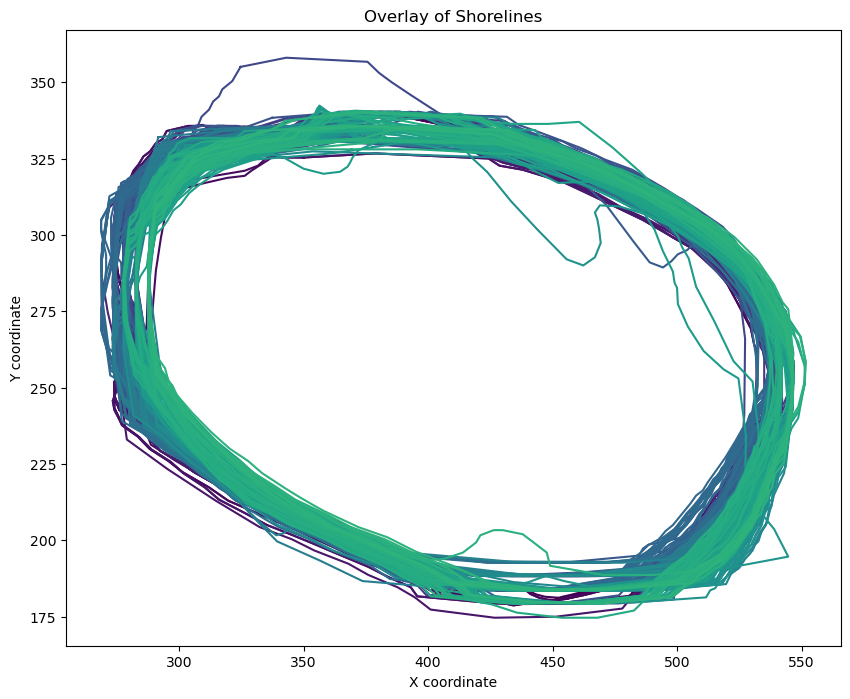

In [49]:
import pandas as pd
import os

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for idx, csv_file in enumerate(good_files):
    csv_path = os.path.join(shoreline_path, csv_file)
    df = pd.read_csv(csv_path)
    x = df.iloc[:, 0].tolist()
    y = df.iloc[:, 1].tolist()

    # Close the curve by appending the first point to the end
    x.append(x[0])
    y.append(y[0])
    color = plt.cm.viridis(idx / max(len(csv_files) - 1, 1))
    plt.plot(x, y, linestyle='-', label=csv_file, color=color)

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Overlay of Shorelines")
plt.show()

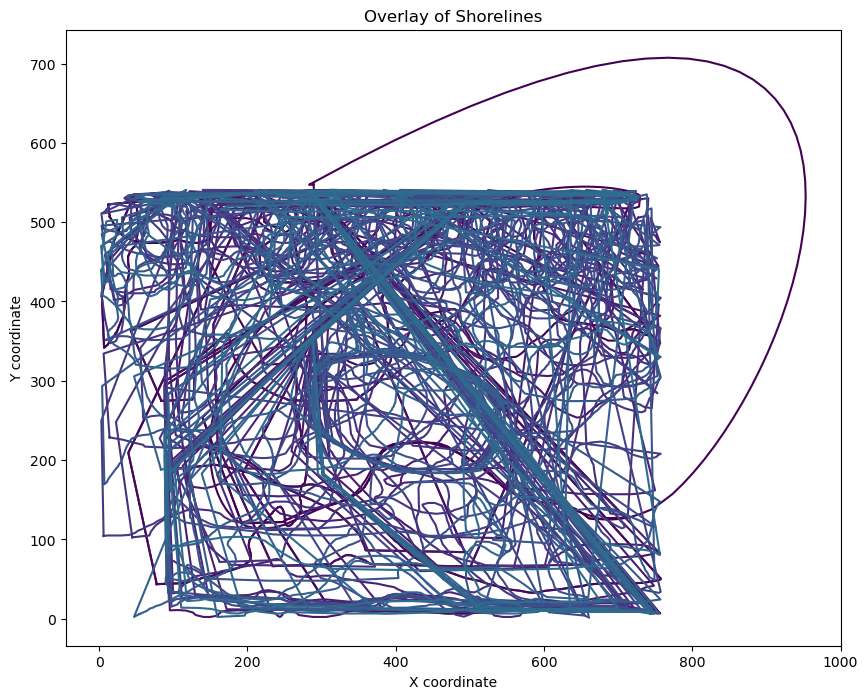

In [50]:
import pandas as pd
import os

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for idx, csv_file in enumerate(bad_files):
    csv_path = os.path.join(shoreline_path, csv_file)
    df = pd.read_csv(csv_path)
    x = df.iloc[:, 0].tolist()
    y = df.iloc[:, 1].tolist()

    # Close the curve by appending the first point to the end
    x.append(x[0])
    y.append(y[0])
    color = plt.cm.viridis(idx / max(len(csv_files) - 1, 1))
    plt.plot(x, y, linestyle='-', label=csv_file, color=color)

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Overlay of Shorelines")
plt.show()

## filter and preview geotransformed shorelines

In [7]:
shoreline_path = save_path + "/" + test_name + "/SHORELINE"

geo_files = [f for f in os.listdir(shoreline_path) if f.endswith('o.csv')]
len(geo_files)

375

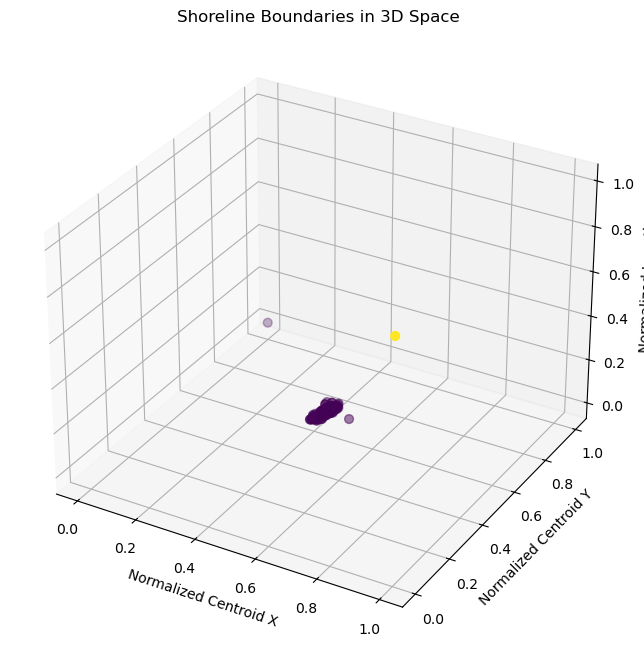

In [8]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

centroids = []
lengths = []

for csv_file in geo_files:
    csv_path = os.path.join(shoreline_path, csv_file)
    df = pd.read_csv(csv_path)
    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values

    # Calculate centroid
    centroid_x = np.mean(x)
    centroid_y = np.mean(y)
    centroids.append((centroid_x, centroid_y))

    # Calculate polyline length
    dx = np.diff(x)
    dy = np.diff(y)
    segment_lengths = np.sqrt(dx**2 + dy**2)
    total_length = np.sum(segment_lengths)
    lengths.append(total_length)

centroids = np.array(centroids)
lengths = np.array(lengths)

# Normalize centroid coordinates and lengths to [0, 1]
centroid_x_norm = (centroids[:, 0] - centroids[:, 0].min()) / (np.ptp(centroids[:, 0]) + 1e-6)
centroid_y_norm = (centroids[:, 1] - centroids[:, 1].min()) / (np.ptp(centroids[:, 1]) + 1e-6)
lengths_norm = (lengths - lengths.min()) / (np.ptp(lengths) + 1e-6)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroid_x_norm, centroid_y_norm, lengths_norm, c=lengths_norm, cmap='viridis', s=40)
ax.set_xlabel('Normalized Centroid X')
ax.set_ylabel('Normalized Centroid Y')
ax.set_zlabel('Normalized Length')
ax.set_title('Shoreline Boundaries in 3D Space')
plt.show()

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np

def filter_main_cluster(x, y, lengths_norm, eps=0.05, min_samples=10):
    """
    Identifies the main cluster in 3D space and removes outliers.

    Args:
        x (np.ndarray): X coordinates (normalized or raw).
        y (np.ndarray): Y coordinates (normalized or raw).
        lengths_norm (np.ndarray): Normalized lengths.
        eps (float): DBSCAN epsilon (distance threshold).
        min_samples (int): Minimum samples for a cluster.

    Returns:
        mask (np.ndarray): Boolean mask for points in the main cluster.
    """
    points = np.stack([x, y, lengths_norm], axis=1)
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(points)
    labels = clustering.labels_
    # Find the largest cluster (excluding noise label -1)
    unique, counts = np.unique(labels[labels != -1], return_counts=True)
    if len(counts) == 0:
        # No clusters found, return all as outliers
        return np.zeros_like(labels, dtype=bool)
    main_cluster = unique[np.argmax(counts)]
    mask = labels == main_cluster
    return mask



In [10]:

mask = filter_main_cluster(centroid_x_norm, centroid_y_norm, lengths_norm)

#apply the mask to the geo_files list
filtered_geo_files = [geo_files[i] for i in range(len(geo_files)) if mask[i]]
len(filtered_geo_files)

372

In [11]:
import numpy as np
import pandas as pd
import os
from geomdl import BSpline, utilities

def get_datetime_from_filename(filename):
    # Assumes format: YYYYMMDDTHHMMSS...
    return pd.to_datetime(filename[:15], format='%Y%m%dT%H%M%S')

def get_spline_and_normals(x, y, num_points=200):
    points = list(zip(x, y))
    if points[0] != points[-1]:
        points.append(points[0])
    curve = BSpline.Curve()
    curve.degree = min(3, len(points) - 1)
    curve.ctrlpts = points
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    curve.delta = 1.0 / (num_points - 1)
    spline_points = np.array(curve.evalpts)
    normals = []
    for j in range(len(spline_points)):
        if j == 0:
            tangent = spline_points[j+1] - spline_points[j]
        elif j == len(spline_points) - 1:
            tangent = spline_points[j] - spline_points[j-1]
        else:
            tangent = spline_points[j+1] - spline_points[j-1]
        normal = np.array([-tangent[1], tangent[0]])
        norm_len = np.linalg.norm(normal)
        normals.append(normal / norm_len if norm_len > 0 else np.zeros_like(normal))
    return spline_points, np.array(normals)

def find_closest_point_and_distance(pt, other_spline):
    """
    Find the closest point on other_spline to pt and return distance and direction vector.
    
    Returns:
        distance (float): Distance to closest point
        direction (np.array): Direction vector from pt to closest point
    """
    distances = np.linalg.norm(other_spline - pt, axis=1)
    closest_idx = np.argmin(distances)
    closest_point = other_spline[closest_idx]
    distance = distances[closest_idx]
    direction = closest_point - pt
    # Normalize direction vector
    if distance > 0:
        direction = direction / distance
    else:
        direction = np.array([0, 0])
    return distance, direction

# Sort shorelines by datetime
shoreline_info = []
for fname in filtered_geo_files:
    dt = get_datetime_from_filename(fname)
    shoreline_info.append((dt, fname))
shoreline_info.sort()
sorted_files = [f for _, f in shoreline_info]

# Precompute splines and normals for all shorelines
shoreline_splines = []
shoreline_normals = []
for fname in sorted_files:
    df = pd.read_csv(os.path.join(shoreline_path, fname))
    x = df['xm'].values if 'xm' in df.columns else df.iloc[:, 0].values
    y = df['ym'].values if 'ym' in df.columns else df.iloc[:, 1].values
    spline, normals = get_spline_and_normals(x, y)
    shoreline_splines.append(spline)
    shoreline_normals.append(normals)

# First loop: Calculate overall average distance across all shorelines
all_distances = []
for i in range(1, len(shoreline_splines) - 1):
    curr_spline = shoreline_splines[i]
    prev_spline = shoreline_splines[i-1]
    next_spline = shoreline_splines[i+1]
    
    for pt in curr_spline:
        dist_prev, _ = find_closest_point_and_distance(pt, prev_spline)
        dist_next, _ = find_closest_point_and_distance(pt, next_spline)
        all_distances.extend([dist_prev, dist_next])

# Calculate global mean distance
global_mean_dist = np.mean(all_distances)
print(f"Global mean distance: {global_mean_dist:.3f}")

# Filtering step using distance and direction criteria
defective_indices = set()
for i in range(1, len(shoreline_splines) - 1):
    curr_spline = shoreline_splines[i]
    prev_spline = shoreline_splines[i-1]
    next_spline = shoreline_splines[i+1]
    
    defective_points = 0
    total_points = len(curr_spline)
    
    for pt in curr_spline:
        dist_prev, dir_prev = find_closest_point_and_distance(pt, prev_spline)
        dist_next, dir_next = find_closest_point_and_distance(pt, next_spline)
        
        # Check if distances are 5 times the average
        if dist_prev > 5 * global_mean_dist or dist_next > 5 * global_mean_dist:
            # Check if direction vectors are within 90 degrees (dot product > 0)
            # If dot product > 0, angle is < 90 degrees
            dot_product = np.dot(dir_prev, dir_next)
            if dot_product > 0:  # Directions are closer than 90 degrees
                defective_points += 1
    
    # If more than 10% of points are defective, mark the shoreline as defective
    if defective_points > 0.1 * total_points:
        defective_indices.add(i)
        print(f"Shoreline {i} marked as defective: {defective_points}/{total_points} defective points")

# Filter out defective shorelines
filtered2_sorted_files = [sorted_files[i] for i in range(len(sorted_files)) if i not in defective_indices]
# get the defective filenames
defective_files = [sorted_files[i] for i in defective_indices]

print(f"Filtered out {len(defective_indices)} defective shorelines.")
print(f"Remaining shorelines: {len(filtered2_sorted_files)}")

Global mean distance: 20.144
Shoreline 121 marked as defective: 31/199 defective points
Shoreline 157 marked as defective: 21/199 defective points
Shoreline 158 marked as defective: 32/199 defective points
Shoreline 159 marked as defective: 44/199 defective points
Shoreline 229 marked as defective: 20/199 defective points
Shoreline 290 marked as defective: 22/199 defective points
Shoreline 313 marked as defective: 20/199 defective points
Shoreline 314 marked as defective: 29/199 defective points
Shoreline 316 marked as defective: 24/199 defective points
Shoreline 365 marked as defective: 20/199 defective points
Filtered out 10 defective shorelines.
Remaining shorelines: 362


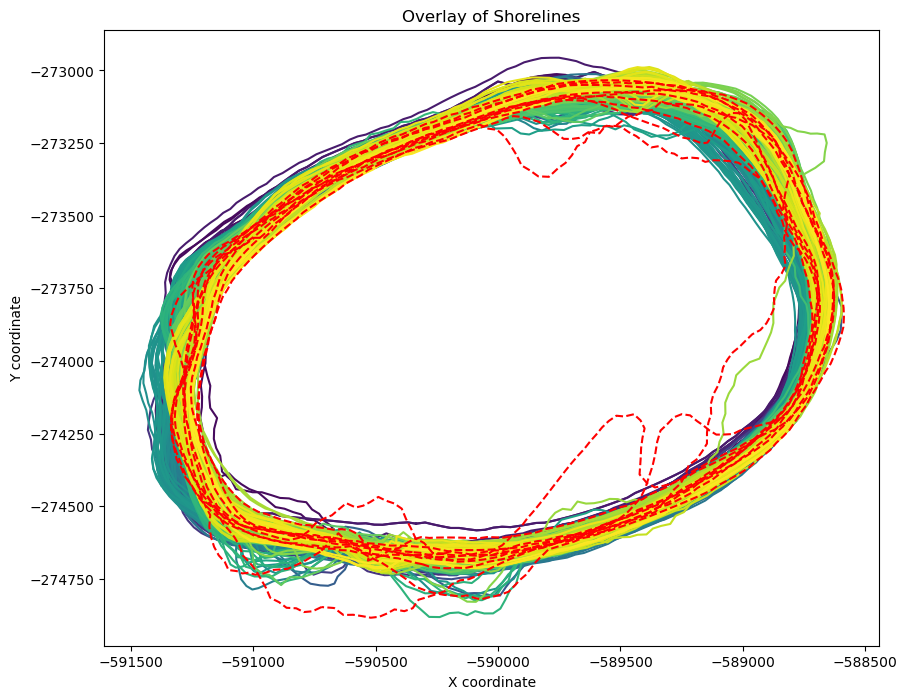

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
for idx, csv_file in enumerate(filtered2_sorted_files):
    csv_path = os.path.join(shoreline_path, csv_file)
    df = pd.read_csv(csv_path)
    x = df.iloc[:, 1].tolist()
    y = df.iloc[:, 0].tolist()

    # Invert the y-axis
    y = [-val for val in y]
    x = [-val for val in x]

    # Close the curve by appending the first point to the end
    x.append(x[0])
    y.append(y[0])
    color = plt.cm.viridis(idx / max(len(filtered2_sorted_files) - 1, 1))
    plt.plot(x, y, linestyle='-', label=csv_file, color=color)

#show the defective files in red
for idx, csv_file in enumerate(defective_files):
    csv_path = os.path.join(shoreline_path, csv_file)
    df = pd.read_csv(csv_path)
    x = df.iloc[:, 1].tolist()
    y = df.iloc[:, 0].tolist()

    # Invert the y-axis
    y = [-val for val in y]
    x = [-val for val in x]

    # Close the curve by appending the first point to the end
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y, linestyle='--', label=csv_file, color='red')

plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Overlay of Shorelines")
plt.show()

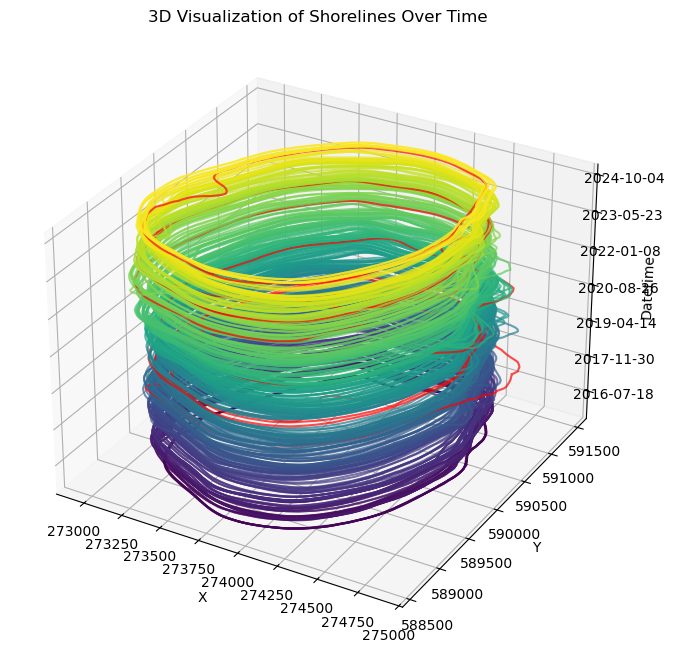

In [15]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Convert datetimes to numeric values (e.g., matplotlib date numbers)
import matplotlib.dates as mdates
datetime_nums = [mdates.date2num(dt) for dt, _ in shoreline_info]

for idx, (dt, fname) in enumerate(shoreline_info):

    # Get corresponding spline
    spline = shoreline_splines[idx]
    # Use x, y from spline
    x = spline[:, 0]
    y = spline[:, 1]
    # Use the same datetime for all points in this shoreline
    z = np.full_like(x, mdates.date2num(dt), dtype=float)
    # if defective, plot in red
    if fname in defective_files:
        ax.plot(x, y, z, label=fname if idx < 10 else None, alpha=0.7, color='red')
    else:
        color = plt.cm.viridis(idx / max(len(shoreline_info) - 1, 1))
        ax.plot(x, y, z, label=fname if idx < 10 else None, alpha=0.7, color=color)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Datetime')
ax.set_title('3D Visualization of Shorelines Over Time')
ax.zaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

## calculate tidal offsets for datetimes

In [50]:
## mount bucket
!mkdir -p /home/walter_littor_al/tide_model
!gcsfuse --implicit-dirs --dir-mode 777 --file-mode 777 aviso-fes2022 /home/walter_littor_al/tide_model

{"timestamp":{"seconds":1758027401,"nanos":678324608},"severity":"INFO","message":"Start gcsfuse/3.1.0 (Go version go1.24.0) for app \"\" using mount point: /home/walter_littor_al/tide_model\n"}
{"timestamp":{"seconds":1758027401,"nanos":678359675},"severity":"INFO","message":"GCSFuse config","config":{"AppName":"","CacheDir":"","Debug":{"ExitOnInvariantViolation":false,"Fuse":false,"Gcs":false,"LogMutex":false},"DisableAutoconfig":false,"EnableAtomicRenameObject":true,"EnableGoogleLibAuth":false,"EnableHns":true,"EnableNewReader":false,"FileCache":{"CacheFileForRangeRead":false,"DownloadChunkSizeMb":200,"EnableCrc":false,"EnableODirect":false,"EnableParallelDownloads":false,"ExperimentalExcludeRegex":"","ExperimentalParallelDownloadsDefaultOn":true,"MaxParallelDownloads":16,"MaxSizeMb":-1,"ParallelDownloadsPerFile":16,"WriteBufferSize":4194304},"FileSystem":{"DirMode":"777","DisableParallelDirops":false,"ExperimentalEnableDentryCache":false,"ExperimentalEnableReaddirplus":false,"FileM

In [1]:
import sys
sys.path.append('/home/walter_littor_al/Littoral_S2download/src')
from littoral import littoral_tide_correction

Google Sheets integration not available. Using local CSV only.


/opt/conda/envs/littoral_pipeline/lib/python3.10/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [4]:
## get a list of datetimes for tide modeling

import pandas as pd

# Load the processing.csv file
csv_path = f"{save_path}/{test_name}/processing.csv"
df_proc = pd.read_csv(csv_path)

# Extract image names
image_names = df_proc['name'] if 'name' in df_proc.columns else df_proc.iloc[:, 0]

# get the characters before the first underscore for each name
sample_date_strs = image_names.str.split('_').str[0]
# parse into a datetime object
times = pd.to_datetime(sample_date_strs, format='%Y%m%dT%H%M%S', utc=True)
times


NameError: name 'save_path' is not defined

In [ ]:
## get the center of the island to locate the tide model

import json
center_location = None
#get the aoi from the json file
with open(f"{save_path}/{test_name}/{test_name}.json") as f:
    settings = json.load(f)
    aoi = settings['aoi']
    center_location = [sum(x) / len(x) for x in zip(*aoi)]

center_location


[72.96810302957029, 5.341929638734165]

In [3]:
# Convert times to numpy datetime64 array for pyTMD compatibility
times_array = times.dt.tz_localize(None).to_numpy()  # Remove timezone and convert to numpy array

tide_df = littoral_tide_correction.model_tides(
    center_location[1], 
    center_location[0],
    times_array,  # Use the converted array
    model="fes2022b",
    directory="/home/walter_littor_al/tide_model",
    epsg=4326,
    method="bilinear",
    extrapolate=True,
    cutoff=10.0,
)

NameError: name 'times' is not defined

In [2]:
tide_df = littoral_tide_correction.calculate_tide_corrections(tide_df,reference_elevation=0,beach_slope=0.08)
tide_df.head()

NameError: name 'tide_df' is not defined

In [54]:
# save tide_df to csv
csv_path = f"{save_path}/{test_name}/tide_corrections.csv"
tide_df.to_csv(csv_path, index=False)
csv_path

'/home/walter_littor_al/geotools_sites/anhenunfushi/tide_corrections.csv'

In [44]:
!fusermount -u /home/walter_littor_al/tide_model

## offsetting shorelines for tides

In [13]:
import sys
sys.path.append('/home/walter_littor_al/Littoral_S2download/src')
from littoral import littoral_tide_correction

/opt/conda/envs/littoral_pipeline/lib/python3.10/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [14]:
def apply_tidal_corrections_to_shorelines(filtered_shoreline_files, shoreline_path, tidal_corrections_path, output_folder="TIDAL_CORRECTED"):
    """
    Apply tidal corrections to filtered shoreline files using spline fitting and normal vectors.
    
    Parameters:
    -----------
    filtered_shoreline_files : list
        List of filtered shoreline CSV file names
    shoreline_path : str
        Path to the directory containing shoreline files
    tidal_corrections_path : str
        Path to the CSV file containing tidal corrections data
    output_folder : str
        Name of the output folder for tidal corrected shorelines
        
    Returns:
    --------
    list : Paths to the tidal corrected shoreline files
    """
    import numpy as np
    import pandas as pd
    import os
    from geomdl import BSpline
    from geomdl import utilities
    from datetime import datetime
    
    # Load tidal corrections data
    tidal_df = pd.read_csv(tidal_corrections_path)
    print(f"Loaded tidal corrections with {len(tidal_df)} entries")
    
    # Create output directory
    output_dir = os.path.join(os.path.dirname(shoreline_path), output_folder)
    os.makedirs(output_dir, exist_ok=True)
    print(f"Created output directory: {output_dir}")
    
    corrected_files = []
    
    for i, shoreline_file in enumerate(filtered_shoreline_files):
        try:
            print(f"Processing {i+1}/{len(filtered_shoreline_files)}: {shoreline_file}")
            
            # Load shoreline data
            csv_path = os.path.join(shoreline_path, shoreline_file)
            df = pd.read_csv(csv_path)
            
            # Extract coordinates (assuming xm, ym columns from geotransform)
            if 'xm' in df.columns and 'ym' in df.columns:
                x_coords = df['xm'].values
                y_coords = df['ym'].values
            else:
                x_coords = df.iloc[:, 0].values
                y_coords = df.iloc[:, 1].values
            
            # Skip if insufficient points
            if len(x_coords) < 4:
                print(f"  Skipping {shoreline_file}: insufficient points ({len(x_coords)})")
                continue
                
            # Extract date from filename for tidal correction lookup
            # Assuming filename format contains date like: YYYYMMDD...
            try:
                date_str = shoreline_file[:8]  # First 8 characters as date
                file_date = datetime.strptime(date_str, '%Y%m%d')
            except:
                print(f"  Warning: Could not extract date from {shoreline_file}, using zero correction")
                tidal_correction_m = 0.0
            else:
                # Find the closest date
                # Make a copy of tidal_df to avoid modifying the original
                tidal_df_work = tidal_df.copy()
                tidal_df_work['dates'] = pd.to_datetime(tidal_df_work['dates'], errors='coerce')
                tidal_df_work = tidal_df_work.dropna(subset=['dates'])
                
                # Ensure both dates are timezone-naive for comparison
                if tidal_df_work['dates'].dt.tz is not None:
                    tidal_df_work['dates'] = tidal_df_work['dates'].dt.tz_localize(None)
                
                # Convert file_date to pandas timestamp (timezone-naive)
                file_date_ts = pd.Timestamp(file_date)
                
                tidal_df_work['date_diff'] = (tidal_df_work['dates'] - file_date_ts).abs()
                tidal_match = tidal_df_work.loc[tidal_df_work['date_diff'] == tidal_df_work['date_diff'].min()]
                if len(tidal_match) > 0:
                    tidal_correction_m = tidal_match['cross_distance'].iloc[0]
                else:
                    print(f"  Warning: No tidal correction found for {date_str}, using zero")
                    tidal_correction_m = 0.0
            
            print(f"  Tidal correction: {tidal_correction_m:.3f} m")
            
            # Create B-spline curve
            # Prepare points for spline (ensure closed curve)
            points = list(zip(x_coords, y_coords))
            if points[0] != points[-1]:
                points.append(points[0])  # Close the curve
            
            # Create B-spline curve
            curve = BSpline.Curve()
            curve.degree = min(3, len(points) - 1)  # Cubic or lower if insufficient points
            curve.ctrlpts = points
            
            # Generate knot vector
            curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
            
            # Extract 200 evenly spaced points along the curve
            curve.delta = 1.0 / 199  # For 200 points (0 to 1 inclusive)
            spline_points = curve.evalpts
            spline_points = np.array(spline_points)
            
            # Calculate normal vectors at each point
            corrected_points = []
            
            for j in range(len(spline_points)):
                current_point = spline_points[j]
                
                # Calculate tangent vector using neighboring points
                if j == 0:
                    # First point: use forward difference
                    tangent = spline_points[j+1] - current_point
                elif j == len(spline_points) - 1:
                    # Last point: use backward difference
                    tangent = current_point - spline_points[j-1]
                else:
                    # Middle points: use central difference
                    tangent = spline_points[j+1] - spline_points[j-1]
                
                # Calculate normal vector (rotate tangent 90 degrees)
                # For outward normal, we need to determine which direction is "out"
                normal = np.array([-tangent[1], tangent[0]])  # Rotate 90 degrees counterclockwise
                
                # Normalize the normal vector
                normal_length = np.linalg.norm(normal)
                if normal_length > 0:
                    normal = normal / normal_length
                
                # Apply tidal correction by moving point along normal vector
                corrected_point = current_point + normal * tidal_correction_m
                corrected_points.append(corrected_point)
            
            # Save corrected shoreline
            corrected_points = np.array(corrected_points)
            corrected_df = pd.DataFrame({
                'xm': corrected_points[:, 0],
                'ym': corrected_points[:, 1]
            })
            
            # Generate output filename
            output_filename = shoreline_file.replace('.csv', '_tidal_corrected.csv')
            output_path = os.path.join(output_dir, output_filename)
            
            corrected_df.to_csv(output_path, index=False)
            corrected_files.append(output_path)
            
            print(f"  Saved corrected shoreline: {output_filename}")
            
        except Exception as e:
            print(f"  Error processing {shoreline_file}: {e}")
            continue
    
    print(f"\nSuccessfully processed {len(corrected_files)} out of {len(filtered_shoreline_files)} shorelines")
    return corrected_files

In [16]:
# Apply tidal corrections to the filtered shorelines
print("=== APPLYING TIDAL CORRECTIONS ===")

# Check if we have the tidal corrections file available
tidal_corrections_csv = f"{save_path}/{test_name}/tide_corrections.csv"

if os.path.exists(tidal_corrections_csv):
    print(f"Using tidal corrections from: {tidal_corrections_csv}")
    
    # Apply tidal corrections to filtered shorelines
    corrected_shoreline_paths = apply_tidal_corrections_to_shorelines(
        filtered_shoreline_files=filtered_geo_files,
        shoreline_path=shoreline_path,
        tidal_corrections_path=tidal_corrections_csv,
        output_folder="TIDAL_CORRECTED"
    )
    
    print(f"\nTidal corrections applied successfully!")
    print(f"Corrected shorelines saved to: {len(corrected_shoreline_paths)} files")
    
else:
    print(f"Tidal corrections file not found at: {tidal_corrections_csv}")
    print("Please run the tidal modeling section first to generate tide corrections.")

=== APPLYING TIDAL CORRECTIONS ===
Using tidal corrections from: /home/walter_littor_al/geotools_sites/anhenunfushi/tide_corrections.csv
Loaded tidal corrections with 845 entries
Created output directory: /home/walter_littor_al/geotools_sites/anhenunfushi/TIDAL_CORRECTED
Processing 1/372: 20150826T053705_20160415T225305_T43NBF_nir_geo.csv
  Tidal correction: -0.015 m
  Saved corrected shoreline: 20150826T053705_20160415T225305_T43NBF_nir_geo_tidal_corrected.csv
Processing 2/372: 20150826T053705_20160415T225305_T43NBG_nir_geo.csv
  Tidal correction: -0.015 m
  Saved corrected shoreline: 20150826T053705_20160415T225305_T43NBG_nir_geo_tidal_corrected.csv
Processing 3/372: 20150826T053706_20150826T053705_T43NBF_nir_geo.csv
  Tidal correction: -0.015 m
  Saved corrected shoreline: 20150826T053706_20150826T053705_T43NBF_nir_geo_tidal_corrected.csv
Processing 4/372: 20150826T053706_20150826T053705_T43NBG_nir_geo.csv
  Tidal correction: -0.015 m
  Saved corrected shoreline: 20150826T053706_201

## visualize tidally corrected shorelines

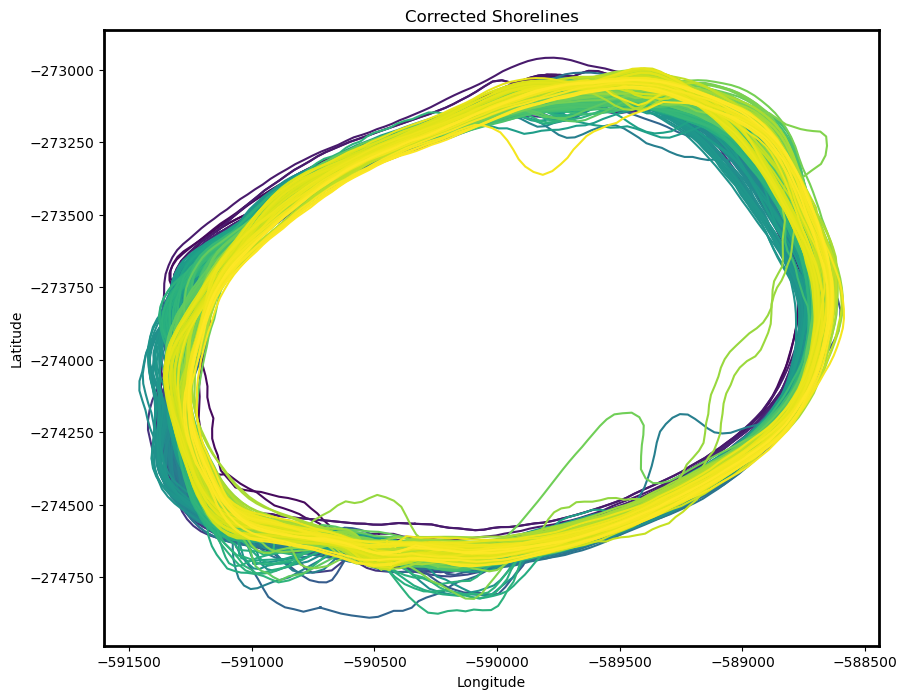

In [20]:
#visualize corrected shorelines
import pandas as pd
import os
import matplotlib.pyplot as plt
corrected_shoreline_folder = shoreline_path.replace("SHORELINE","TIDAL_CORRECTED")
corrected_files = [f for f in os.listdir(corrected_shoreline_folder) if f.endswith('_tidal_corrected.csv')]

plt.figure(figsize=(10, 8))
for idx, csv_file in enumerate(corrected_files):
    csv_path = os.path.join(corrected_shoreline_folder, csv_file)
    df = pd.read_csv(csv_path)
    x = df.iloc[:, 1].tolist()
    y = df.iloc[:, 0].tolist()

    # Invert the y-axis
    y = [-val for val in y]
    x = [-val for val in x]

    # Close the curve by appending the first point to the end
    x.append(x[0])
    y.append(y[0])
    color = plt.cm.viridis(idx / max(len(corrected_files) - 1, 1))
    plt.plot(x, y, linestyle='-', label=csv_file, color=color)

plt.title("Corrected Shorelines")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

## unmount bucket with gcfuse

In [16]:
!fusermount -u /home/walter_littor_al/geotools_sites